Yule Process for directed mutation

In [ ]:
#continuous time
import numpy as np
import matplotlib.pyplot as plt

# This shows the simulation for directed mutation. We have population of cell. It grows until time T(phage is introduced). 
# The sensitive die. We have only resistance cell left.

def yule_process_directed(cell_division_rate, mutation_rate, max_time, initial_population, phage_time):

    # parameter
    new_mutation = 0
    time = 0
    population = initial_population
    times = [time]
    populations = [population]
    mutations = [new_mutation]
    i = 0
    
    while time < max_time:
        # generate random time with rate n*cell division rate
        next_time = np.random.exponential(1/(population*cell_division_rate))
        time += next_time
        population += 1
        
        # add phage there is a mutation
        if time > phage_time:
            mutation_prob = mutation_rate*next_time
            new_mutation = np.random.binomial(1,mutation_prob,population).sum()
            mutations.append(new_mutation) 
            break
        times.append(time)
        populations.append(population)
        mutations.append(new_mutation) 
        
    return times, populations, mutations

def yule_for_mutant(cell_division_rate, time, mutant, max_time):
    times = [time]
    mutants = [mutant]
    while time < max_time:
        # generate random time with rate mutant*cell division rate
        next_time = np.random.exponential(1/(mutant*cell_division_rate))
        time += next_time
        mutant += 1
        times.append(time)
        mutants.append(mutant)
    return times, mutants

cell_division_rate = 0.2
max_time = 40.0 
mutation_rate = 10**(-4)
initial_population = 1
phage_time = 20

total_pop = []

times, populations, mutants = yule_process_directed(cell_division_rate, mutation_rate, max_time, initial_population, phage_time)

plt.step(times, populations, where="post")
plt.title("Pure Birth Process Simulation")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.grid(True)
#plt.show()

print(populations[-1])
print(mutants[-1])

# use yule_for_mutant when mutant occurs
if mutants[-1] != 0:
    mtimes, mmutants = yule_for_mutant(cell_division_rate, times[-1], mutants[-1], max_time)
    plt.step(mtimes, mmutants, where="post")
    print(mtimes, mmutants)

plt.show()



Yule Process for spontaneous mutation

[3.4723916656582197, 3.945134170951773, 4.050630687898442, 4.355866284140838, 4.381303587488898, 4.569936131708186, 4.724750866981831, 4.73161132320877, 4.739624843096798, 4.759914940371768, 4.8552800691776845, 4.8620919688622175, 4.872013388213053, 5.0046784594495035] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[3.6296037069326985, 4.744590437053935, 4.996921193676421, 5.320339355405798] [1, 2, 3, 4]
[3.642582083632953, 3.8196279078225617, 4.091569360475402, 4.133610817193574, 4.256069213901958, 4.31866549226734, 4.3416309788233685, 4.352315219031655, 4.358125766433726, 4.4603724620769905, 4.480733589653636, 4.572311997333552, 4.606469227072125, 4.648428396450547, 4.704427506899963, 4.720388444192276, 4.762038927991581, 4.84586753703461, 4.851780477562246, 4.865792954399561, 4.8977711674968685, 4.8994597693823705, 4.941142695897222, 4.941154630930702, 5.0519476848202745] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[4.19470171416498, 

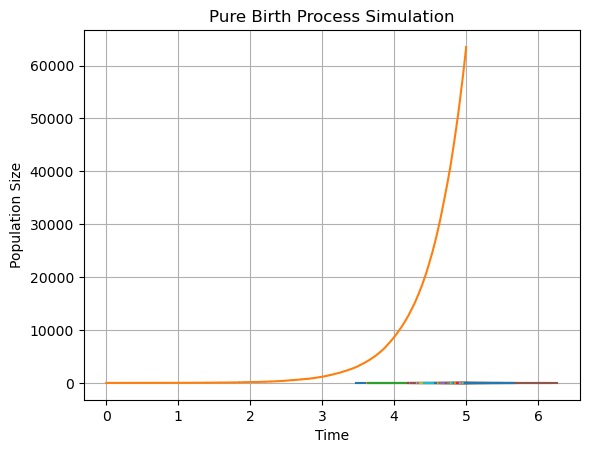

In [58]:
#continuous time

# This shows the simulation for spontaneous mutation. We have population of cell. It grows until max_time. 
# The mutation occurs and we add phage at the max_time.

import numpy as np
import matplotlib.pyplot as plt

def yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population):

    time = 0
    population = initial_population
    times = [time]
    populations = [population]
    mutants = [0]
    i = 0
    
    while time < max_time:
        # generate random time with rate n*cell division rate
        next_time = np.random.exponential(1/(population*cell_division_rate))
        time += next_time
        population += 1
        mutation_prob = mutation_rate*next_time
        new_mutation = np.random.binomial(1,mutation_prob,population).sum()
        times.append(time)
        populations.append(population)
        mutants.append(new_mutation) 
        
    return times, populations, mutants

def yule_for_mutant(cell_division_rate, time, mutant, max_time):
    times = [time]
    mutants = [mutant]
    while time < max_time:
        next_time = np.random.exponential(1/(mutant*cell_division_rate))
        time += next_time
        mutant += 1
        times.append(time)
        mutants.append(mutant)
    return times, mutants


cell_division_rate = 2
max_time = 5
mutation_rate = 10**(-3)
initial_population = 1

total_pop = []

pop = []
mut = []


times, populations, mutants = yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population)
tot_mutants = 0

for i in range(len(mutants)):
    if mutants[i] != 0:
        mtimes, mmutants = yule_for_mutant(cell_division_rate, times[i], mutants[i], max_time)
        print(mtimes, mmutants)
        tot_mutants += mmutants[-1]
        plt.step(mtimes, mmutants, where="post")
        
            
print("population = ", populations[-1], ", mutation = ",tot_mutants)

plt.step(times, populations, where="post")
plt.title("Pure Birth Process Simulation")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.grid(True)

plt.show()

repeat yule process 


mutants mean is  6.94
mutants variance is  104.49640000000001
theory mutants mean is  8
theory mutants variance is  5961.915974083457


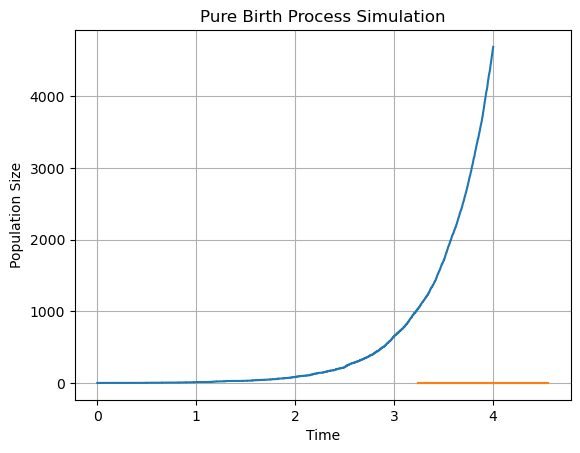

In [61]:
# continuous time
# many time
import numpy as np
import matplotlib.pyplot as plt

def yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population):

    time = 0
    population = initial_population
    times = [time]
    populations = [population]
    mutants = [0]
    i = 0
    
    while time < max_time:
        # generate random time with rate n*cell division rate
        next_time = np.random.exponential(1/(population*cell_division_rate))
        time += next_time
        population += 1
        mutation_prob = mutation_rate*next_time
        new_mutation = np.random.binomial(1,mutation_prob,population).sum()
        times.append(time)
        populations.append(population)
        mutants.append(new_mutation) 
        
    return times, populations, mutants

def yule_for_mutant(cell_division_rate, time, mutant, max_time):
    times = [time]
    mutants = [mutant]
    while time < max_time:
        next_time = np.random.exponential(1/(mutant*cell_division_rate))
        time += next_time
        mutant += 1
        times.append(time)
        mutants.append(mutant)
    return times, mutants


cell_division_rate = 2
max_time = 4
mutation_rate = 10**(-3)
initial_population = 1

total_pop = []

pop = []
mut = []

for i in range(50):
    #print()
    #print("round ",i+1)
    times, populations, mutants = yule_process_spontaneous(cell_division_rate, mutation_rate, max_time, initial_population)
    #print(times[-1])
    
    tot_mutants = 0

    for i in range(len(mutants)):
        if mutants[i] != 0:
            #print("time = ", times[i],", mutant = ",mutants[i])
            mtimes, mmutants = yule_for_mutant(cell_division_rate, times[i], mutants[i], max_time)
            tot_mutants += mmutants[-1]
            #print(mtimes, mmutants)
            
    pop.append(populations[-1])
    mut.append(tot_mutants)
    #print(populations[-1], tot_mutants)

print()
print("mutants mean is ",np.mean(mut))
print("mutants variance is ",np.var(mut))

print("theory mutants mean is ", cell_division_rate*max_time)
print("theory mutants variance is ", 2*np.exp(cell_division_rate*max_time))

plt.step(times, populations, where="post")
plt.title("Pure Birth Process Simulation")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.grid(True)
plt.step(mtimes, mmutants, where="post")

plt.show()


NHPP for directed mutation

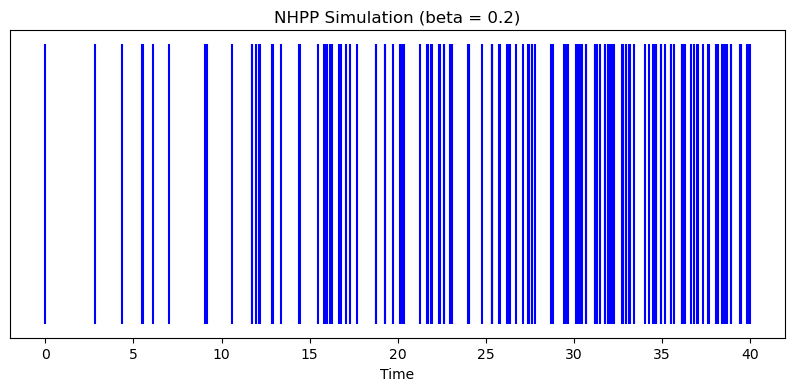

Simulated event times: [0, 2.833568830506272, 4.355477461192347, 5.487296735353086, 5.533505117393611, 6.087757854462309, 7.009850548866694, 9.034570966250309, 9.169114696865421, 10.600274006502186, 11.715329353199857, 11.740827895771869, 11.938195416966622, 12.101642878348159, 12.145469883566399, 12.155625953711553, 12.88621667617018, 12.897123389062523, 13.384615017717557, 14.394237599846269, 14.463268544768455, 15.499534263685646, 15.786968299799158, 15.8942177053547, 15.939438809311039, 15.998388001641743, 16.174377912130307, 16.27570746499434, 16.684531373187227, 16.77146552971755, 17.061056752437118, 17.27670524016273, 17.690355477325973, 18.769670007541176, 18.77382496103062, 19.247579293512533, 19.2575779627834, 19.734844146037602, 20.135024616221333, 20.185527556222347, 20.303528656413445, 20.374508126009367, 21.276484976113416, 21.64065685829287, 21.70053385480625, 21.854737251112926, 21.932567986683303, 22.334994864857048, 22.394951315636845, 22.595335294929843, 22.618636913

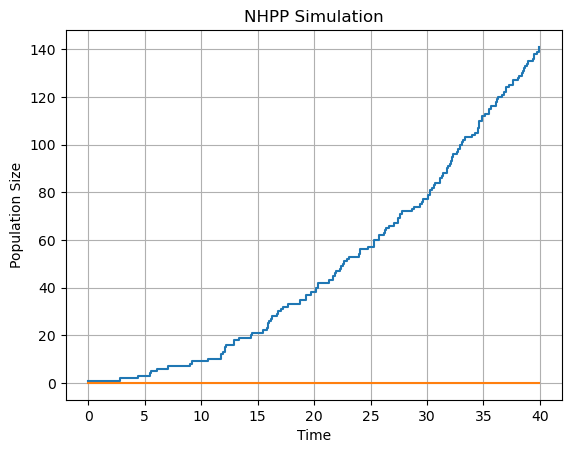

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def nhpp_simulation_time(cell_division_rate, max_time):

    time = 0
    times = [time]
    max_lambda = cell_division_rate*max_time 
    
    while time < max_time:
        # Draw the inter-arrival time from an exponential distribution with rate max_lambda
        next_time = np.random.exponential(1 / max_lambda)
        time += next_time
        
        if time > max_time:
            break
        
        # Step 2: Thinning - accept the event with probability lambda(t) / max_lambda
        acceptance_prob = (cell_division_rate * time) / max_lambda
        if np.random.uniform(0, 1) <= acceptance_prob:
            times.append(time)
    
    return times

cell_division_rate = 0.2   
max_time = 40    
initial_population = 1
phage_time = 40
mutation_rate = 10**(-4)

# Simulate the NHPP
times = nhpp_simulation_time(cell_division_rate, max_time)

# Plot the event times
plt.figure(figsize=(10, 4))
plt.vlines(times, ymin=0, ymax=1, color='b', label='Event')
plt.title(f"NHPP Simulation (beta = {cell_division_rate})")
plt.xlabel("Time")
plt.yticks([])
plt.show()

# Print the event times
print("Simulated event times:", times)

def nhpp_simulation_cell(times, initial_poplutaion, phage_time, mutation_rate):
    
    population = initial_population
    populations = [population]
    mutants = [0]
    
    for i in range(1,len(times)):
        if times[i] < phage_time:
            population += 1
            populations.append(population)
            mutants.append(0)
        else:
            mutation_prob = mutation_rate*times[i]
            new_mutation = np.random.binomial(1,mutation_prob,population).sum()
            mutants.append(new_mutation)
            populations.append(0)
    return times, populations, mutants

times, populations, mutants = nhpp_simulation_cell(times, initial_population, phage_time, mutation_rate)

plt.step(times, populations, where="post")
plt.step(times, mutants, where="post")
plt.title("NHPP Simulation")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.grid(True)
plt.show()
        

